In [1]:
#!pip freeze > ../requests.txt
#!pip install sklearn
#!pip install xgboost

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
PATH1 = "../data/Desafio de Dados FieldPRO/Sensor_FieldPRO.csv"
PATH2 = "../data/Desafio de Dados FieldPRO/Estacao_Convencional.csv"

sensor_df = pd.read_csv(PATH1)
estacao_df = pd.read_csv(PATH2)

In [4]:
sensor_df.shape, sensor_df.columns

((1711, 7),
 Index(['Datetime – utc', 'air_humidity_100', 'air_temperature_100',
        'atm_pressure_main', 'num_of_resets', 'piezo_charge',
        'piezo_temperature'],
       dtype='object'))

In [5]:
estacao_df.shape, estacao_df.columns

((2256, 3), Index(['data', 'Hora (Brasília)', 'chuva'], dtype='object'))

In [6]:
sensor_df.isna().sum()
#sensor_df[sensor_df.air_humidity_100.isna()]
#sensor_df[sensor_df.num_of_resets.eq(3)]

Datetime – utc         0
air_humidity_100       6
air_temperature_100    6
atm_pressure_main      0
num_of_resets          0
piezo_charge           0
piezo_temperature      0
dtype: int64

In [7]:
sensor_df['data'] = pd.to_datetime(sensor_df['Datetime – utc'], format='mixed')

In [8]:
sensor_df['data'] = sensor_df.data.astype(str).str.split('+',expand=True)[0]

In [9]:
sensor_df.data

0       2020-09-30 23:00:00
1       2020-10-01 00:00:00
2       2020-10-01 01:00:00
3       2020-10-01 02:00:00
4       2020-10-01 03:00:00
               ...         
1706    2020-12-11 09:00:00
1707    2020-12-11 10:00:00
1708    2020-12-11 11:00:00
1709    2020-12-11 12:00:00
1710    2020-12-11 13:00:00
Name: data, Length: 1711, dtype: object

In [10]:
estacao_df#.isna().sum()
estacao_df['data'] = estacao_df.data + ' ' + estacao_df['Hora (Brasília)']

In [11]:
estacao_df

,data,Hora (Brasília),chuva
0,2020-09-01 00:00:00,00:00:00,0.0
1,2020-09-01 01:00:00,01:00:00,0.0
2,2020-09-01 02:00:00,02:00:00,0.0
3,2020-09-01 03:00:00,03:00:00,0.0
4,2020-09-01 04:00:00,04:00:00,0.0
...,...,...,...
2251,2020-12-03 19:00:00,19:00:00,0.0
2252,2020-12-03 20:00:00,20:00:00,0.0
2253,2020-12-03 21:00:00,21:00:00,0.0
2254,2020-12-03 22:00:00,22:00:00,0.0


In [12]:
dados_df = pd.merge(sensor_df,estacao_df[['data','chuva']], on='data')

In [13]:
dados_df.dropna(inplace=True)

In [14]:
dados_df.chuva.unique()

array([ 0. ,  0.2,  1.2,  2.2,  9.2,  4. ,  0.4,  1.6,  0.8,  0.6,  3. ,
        1.8,  5.6,  2.4,  2.8, 16.8,  3.6,  4.2,  3.4,  2. ,  6.8,  6.2,
        3.8,  4.6,  1. , 15.2,  8.2])

<Axes: >

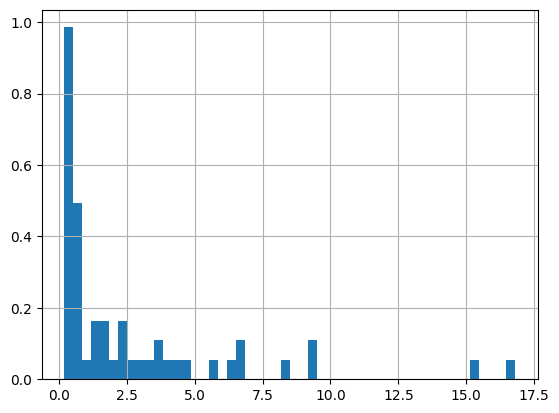

In [15]:
#dados_df.chuva.hist(density=True, bins=20)
dados_df[~dados_df.chuva.eq(0)].chuva.hist(density=True, bins=50)

<Axes: >

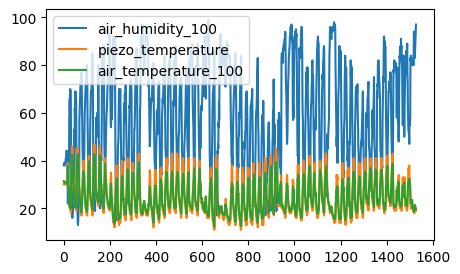

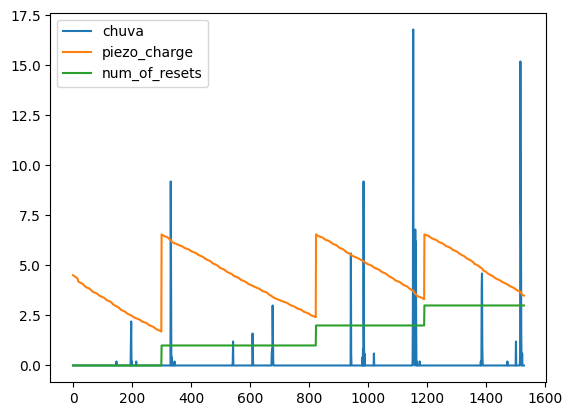

In [16]:
fig, ax = plt.subplots(figsize=(5,3))
#plt.subplot(121)
dados_df[['air_humidity_100']].plot(ax=ax)
dados_df[['piezo_temperature']].plot(ax=ax)
dados_df[['air_temperature_100']].plot(ax=ax)

#plt.subplot(122)
ax2 = dados_df[['chuva']].plot()
(dados_df[['piezo_charge']]/10000).plot(ax=ax2)
dados_df[['num_of_resets']].plot(ax=ax2)


#ax = plt.hist(sensor_df.piezo_charge)

In [43]:
dados_df['dif_charge'] = dados_df.groupby('num_of_resets').piezo_charge.diff(-1)#.apply(np.log)
rms = np.sqrt(dados_df.groupby('num_of_resets').dif_charge.apply(lambda x: x**2).mean())
#dados_df['dif_charge'] = dados_df.dif_charge.apply(np.log)
dados_df.dropna(inplace=True)
#dados_df['dif_charge'] = (100*dados_df['dif_charge']/dados_df['piezo_charge'])#.apply(np.log).apply(np.abs)
dados_df['dif_charge'] = (100*dados_df['dif_charge']/rms)#.apply(np.log).apply(np.abs)
#aux = dados_df[dados_df.num_of_resets.eq(1)]
#aux.piezo_charge.diff(-1)


In [44]:
dados_df.isna().sum()

Datetime – utc         0
air_humidity_100       0
air_temperature_100    0
atm_pressure_main      0
num_of_resets          0
piezo_charge           0
piezo_temperature      0
data                   0
chuva                  0
dif_charge             0
dif_temp               0
extra                  0
precp                  0
dtype: int64

<Axes: >

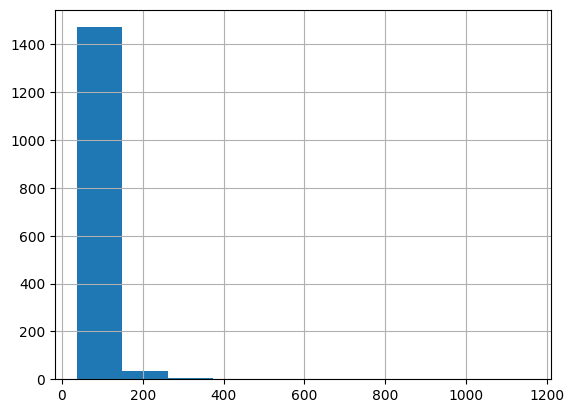

In [45]:
dados_df.dif_charge.hist()

<Axes: >

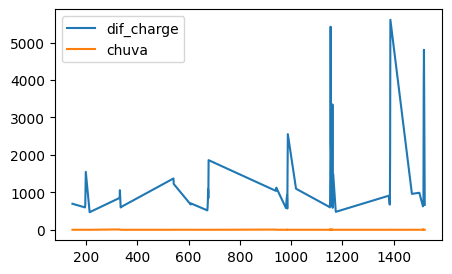

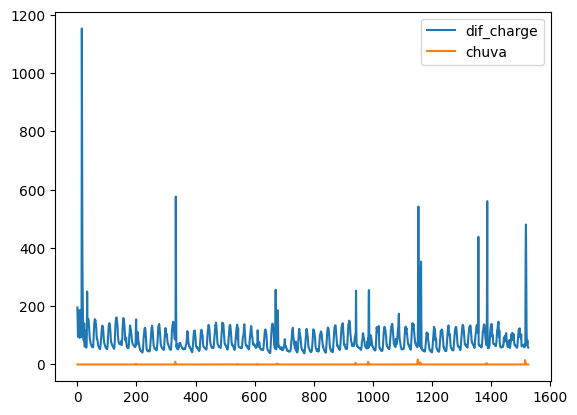

In [46]:
fig, ax = plt.subplots(figsize=(5,3))
#plt.subplot(121)
(dados_df.loc[dados_df.chuva.gt(0),['dif_charge']]*10).plot(ax=ax)
(dados_df.loc[dados_df.chuva.gt(0),['chuva']]).plot(ax=ax)

#plt.subplot(122)
ax2 = (dados_df[['dif_charge']]).plot()
(dados_df[['chuva']]).plot(ax=ax2)


<Axes: >

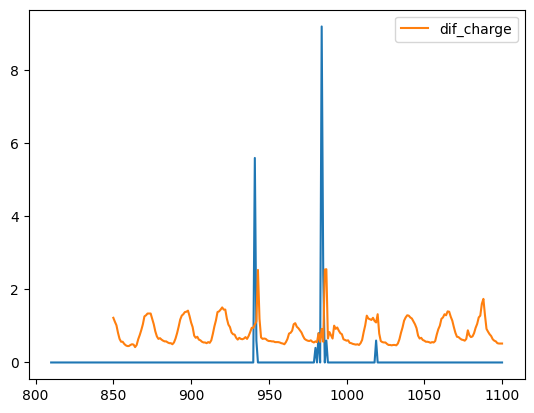

In [47]:
ax = dados_df.loc[810:1100].chuva.plot()
(dados_df.loc[850:1100,['dif_charge']]/100).plot(ax=ax)
#dados_df.loc[810:1100].plot(kind='line',x='piezo_charge', y='chuva')

In [48]:
dados_df[['piezo_temperature','air_temperature_100']]
dados_df['dif_temp'] = dados_df['air_temperature_100'] - dados_df['piezo_temperature'].astype(float)

dados_df['extra'] = dados_df.dif_temp*dados_df.dif_charge

In [49]:
dados_df['precp'] = dados_df.chuva.apply(lambda x: 0 if x==0.0 else 1)

In [50]:
dados_df

,Datetime – utc,air_humidity_100,air_temperature_100,atm_pressure_main,num_of_resets,piezo_charge,piezo_temperature,data,chuva,dif_charge,dif_temp,extra,precp
0,2020-09-30T23:00:00Z,38.0,31.366,9412,0,45123,30,2020-09-30 23:00:00,0.0,195.716758,1.366,267.349092,0
2,2020-10-01T01:00:00Z,39.0,31.366,9419,0,44923,31,2020-10-01 01:00:00,0.0,95.901212,0.366,35.099843,0
3,2020-10-01T02:00:00Z,39.0,31.322,9419,0,44825,31,2020-10-01 02:00:00,0.0,94.922628,0.322,30.565086,0
4,2020-10-01T03:00:00Z,38.0,31.240,9416,0,44728,31,2020-10-01 03:00:00,0.0,93.944044,0.240,22.546571,0
5,2020-10-01T04:00:00Z,39.0,30.828,9411,0,44632,30,2020-10-01 04:00:00,0.0,186.909504,0.828,154.761070,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1522,2020-12-03T18:00:00Z,83.0,21.420,9413,3,35287,20,2020-12-03 18:00:00,0.0,68.500865,1.420,97.271229,0
1523,2020-12-03T19:00:00Z,86.0,20.880,9412,3,35217,20,2020-12-03 19:00:00,0.0,83.179622,0.880,73.198068,0
1524,2020-12-03T20:00:00Z,90.0,20.980,9409,3,35132,19,2020-12-03 20:00:00,0.0,62.629363,1.980,124.006138,0
1525,2020-12-03T21:00:00Z,93.0,20.620,9408,3,35068,20,2020-12-03 21:00:00,0.0,59.693611,0.620,37.010039,0


import seaborn as sns

sns.heatmap(dados_df.corr(), annot=True)

# Calibrator

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, classification_report
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.svm import SVR
from sklearn.linear_model import SGDRegressor, Lasso, LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from xgboost import XGBRegressor, XGBClassifier

In [52]:
dados_df.columns


Index(['Datetime – utc', 'air_humidity_100', 'air_temperature_100',
       'atm_pressure_main', 'num_of_resets', 'piezo_charge',
       'piezo_temperature', 'data', 'chuva', 'dif_charge', 'dif_temp', 'extra',
       'precp'],
      dtype='object')

In [53]:
cols = ['air_humidity_100',
       'atm_pressure_main',
       'piezo_temperature', 'dif_charge', 'dif_temp', 'precp']

In [54]:
=

SyntaxError: invalid syntax (1763773627.py, line 1)

In [55]:
#X = dados_df.loc[~dados_df.chuva.eq(0),cols].copy()
X = dados_df[cols].copy()
y = X.pop('precp')
#y = 100*y 

In [56]:
X.columns

Index(['air_humidity_100', 'atm_pressure_main', 'piezo_temperature',
       'dif_charge', 'dif_temp'],
      dtype='object')

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [58]:
classifier_RF = RandomForestClassifier()
classifier_RF.fit(X_train, y_train)

RandomForestClassifier()

In [60]:
classifier_RF.score(X_train,y_train), classifier_RF.score(X_test,y_test)

(1.0, 0.9802631578947368)

In [61]:
#print(classification_report(y_train, classifier_RF.predict(X_train)))
print(classification_report(y_test, classifier_RF.predict(X_test)))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       445
           1       0.75      0.27      0.40        11

    accuracy                           0.98       456
   macro avg       0.87      0.64      0.69       456
weighted avg       0.98      0.98      0.98       456



In [62]:
classifier_XGB = XGBClassifier()
classifier_XGB.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [63]:
classifier_XGB.score(X_train,y_train), classifier_XGB.score(X_test,y_test)
print(classification_report(y_test, classifier_XGB.predict(X_test)))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       445
           1       0.43      0.27      0.33        11

    accuracy                           0.97       456
   macro avg       0.71      0.63      0.66       456
weighted avg       0.97      0.97      0.97       456



### Bootstraping Classifier

In [64]:
X_bst = pd.concat([X_train, y_train], axis=1)

In [65]:
N = X_bst[X_bst.precp.eq(0)].shape[0]

In [66]:
#df_aux = X_bst[~X_bst.precp.eq(0)]
for n in range(1,len(X_bst.precp.unique())):
    df_aux = X_bst[X_bst.precp.eq(n)]
    df_aux = df_aux.sample(n=N, replace=True)
    X_bst = pd.concat([X_bst,df_aux])
    

In [67]:
df_aux

,air_humidity_100,atm_pressure_main,piezo_temperature,dif_charge,dif_temp,precp
673,65.0,9394,17,51.864941,0.200,1
1516,80.0,9430,20,70.458033,0.880,1
197,82.0,9387,20,66.543698,0.966,1
1155,96.0,9411,18,228.010023,0.700,1
1164,95.0,9393,18,148.744736,0.020,1
...,...,...,...,...,...,...
1155,96.0,9411,18,228.010023,0.700,1
608,67.0,9412,22,67.522282,0.340,1
344,88.0,9483,19,63.607946,0.800,1
980,91.0,9445,18,57.736444,1.040,1


In [68]:
X_bst

,air_humidity_100,atm_pressure_main,piezo_temperature,dif_charge,dif_temp,precp
1259,31.0,9443,33,99.815547,-2.160,0
533,79.0,9461,16,52.843525,1.660,0
825,21.0,9433,36,112.537136,-1.780,0
395,38.0,9480,34,114.494304,-6.120,0
23,39.0,9401,26,140.916066,1.980,0
...,...,...,...,...,...,...
1155,96.0,9411,18,228.010023,0.700,1
608,67.0,9412,22,67.522282,0.340,1
344,88.0,9483,19,63.607946,0.800,1
980,91.0,9445,18,57.736444,1.040,1


In [69]:
y_train = X_bst.pop('precp')
X_train = X_bst

In [70]:
classifier_RF = RandomForestClassifier()
classifier_RF.fit(X_train, y_train)

RandomForestClassifier()

In [71]:
classifier_RF.score(X_train,y_train), classifier_RF.score(X_test,y_test)

(1.0, 0.9714912280701754)

In [72]:
#print(classification_report(y_train, classifier_RF.predict(X_train)))
print(classification_report(y_test, classifier_RF.predict(X_test)))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       445
           1       0.38      0.27      0.32        11

    accuracy                           0.97       456
   macro avg       0.68      0.63      0.65       456
weighted avg       0.97      0.97      0.97       456



## Regressor

In [73]:
dados_df.columns

Index(['Datetime – utc', 'air_humidity_100', 'air_temperature_100',
       'atm_pressure_main', 'num_of_resets', 'piezo_charge',
       'piezo_temperature', 'data', 'chuva', 'dif_charge', 'dif_temp', 'extra',
       'precp'],
      dtype='object')

In [74]:
cols = ['air_humidity_100', 'air_temperature_100',
       'atm_pressure_main', 'num_of_resets',
       'piezo_temperature', 'chuva', 'dif_charge', 'dif_temp', 'extra']

In [75]:
#dados_df.loc[dados_df.chuva.gt(0),cols]

In [76]:
#X = dados_df.loc[~dados_df.chuva.eq(0),cols].copy()
X = dados_df.loc[dados_df.chuva.gt(0), cols].copy()
y = X.pop('chuva')
#y = y.apply(np.log) 

In [96]:
#plt.plot(X['air_humidity_100'], y)
#X['air_humidity_100'].plot()

In [78]:
X.columns

Index(['air_humidity_100', 'air_temperature_100', 'atm_pressure_main',
       'num_of_resets', 'piezo_temperature', 'dif_charge', 'dif_temp',
       'extra'],
      dtype='object')

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

In [80]:
#X_train

In [81]:
calibrador_LR = LinearRegression()
calibrador_LR.fit(X_train, y_train)

LinearRegression()

In [82]:
calibrador_LR.score(X_train, y_train), calibrador_LR.score(X_test, y_test)

(0.14695361730712653, -0.058843272575419325)

In [83]:
lasso = Lasso(alpha=0.01)
lasso.fit(X_train, y_train)

Lasso(alpha=0.01)

In [84]:
lasso.score(X_train, y_train), lasso.score(X_test, y_test)

(0.1469134206220536, -0.06152674211536757)

In [85]:
calibrador_RFR = make_pipeline(StandardScaler(),RandomForestRegressor())
calibrador_RFR.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestregressor', RandomForestRegressor())])

In [86]:
calibrador_RFR.score(X_train, y_train), calibrador_RFR.score(X_test, y_test)

(0.7526932202887674, -0.10993595819143609)

In [87]:
calibrador_RF = RandomForestRegressor(random_state=42)
calibrador_RF.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [88]:
calibrador_RF.score(X_train, y_train), calibrador_RF.score(X_test, y_test)
#r2_score(y_test, calibrador.predict(X_test))

(0.7929351340141029, -0.1376568527749995)

In [89]:
xboost = XGBRegressor()
xboost.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [90]:
xboost.score(X_train, y_train), xboost.score(X_test, y_test)

(0.9999999177633973, -0.2772587471482244)

In [91]:
calibrador_SVR = SVR()
calibrador_SVR.fit(X_train, y_train)

SVR()

In [92]:
calibrador_SVR.score(X_train, y_train), calibrador_SVR.score(X_test, y_test)


(-0.2477109470271126, -0.36105110623986425)

In [93]:
calibrador_SGD = make_pipeline(StandardScaler(),SGDRegressor(max_iter=1000, tol=1e-3))

In [94]:
#calibrador_SGD = SGDRegressor()
calibrador_SGD.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdregressor', SGDRegressor())])

In [95]:
calibrador_SGD.score(X_train, y_train), calibrador_SGD.score(X_test, y_test)

(0.13214898394510466, -0.06944665966030916)

### Bootstrap Regressor

In [ ]:
X_bst = pd.concat([X_train, y_train], axis=1)

In [ ]:
N = 2000

In [ ]:
X_bst = X_bst.sample(n=N, replace=True)

In [ ]:
y_train = X_bst.pop('chuva')
X_train = X_bst

In [ ]:
calibrador_RF = RandomForestRegressor(random_state=42, bootstrap=True)
calibrador_RF.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
calibrador_RF.score(X_train, y_train), calibrador_RF.score(X_test, y_test)
#r2_score(y_test, calibrador_RF.predict(X_test))

(1.0, -1.9937381851449962)

In [ ]:
df_aux = X_bst[~X_bst.chuva.eq(0)]
df_aux = df_aux.sample(n=N, replace=True)

AttributeError: 'DataFrame' object has no attribute 'chuva'

In [ ]:
X_bst = pd.concat([X_bst,df_aux], ignore_index=True)

In [ ]:
y_train = X_bst.pop('chuva')
X_train = X_bst

In [ ]:
calibrador_RF = RandomForestRegressor(random_state=42)
calibrador_RF.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
calibrador_RF.score(X_train, y_train), calibrador_RF.score(X_test, y_test)
#r2_score(y_test, calibrador.predict(X_test))

(1.0, -0.958008816711593)

## Stochastic Regression

<Axes: >

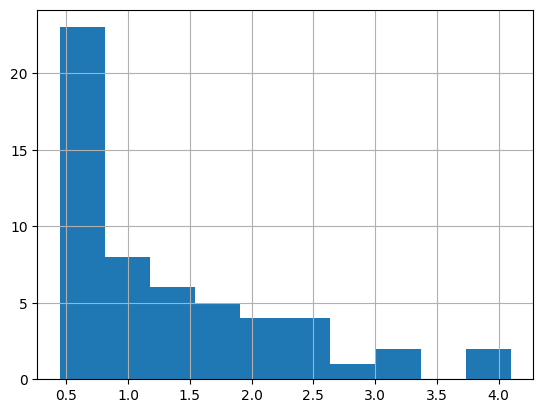

In [ ]:
dados_df[dados_df.chuva.gt(0)].chuva.apply(np.sqrt).hist()
#dados_df.hist()